In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [46]:
f = open("log_encoding.txt", "r")

kb1 = []
kb10 = []
mb1 = []
mb10 = []

for x in f:
    number = float(x.split(',')[-1].strip('\n'))
    if x.startswith("10240,"):
        kb1.append(number)
    elif x.startswith("102400,"):
        kb10.append(number)
    elif x.startswith("1048576,"):
        mb1.append(number)
    elif x.startswith("10485760,"):
        mb10.append(number)

f.close()

kb1np = np.array(kb1)

In [76]:
x = kb1np*1000 # in ms

In [82]:
q5, q95 = np.percentile(x, [5, 95])
x_clipped = x[(x < q95) & (x > q5)]

avg = np.average(x_clipped)
print(avg)
median = np.median(x_clipped)
print(median)

0.11126544444171789
0.1044499999807158


In [78]:
q25, q75 = np.percentile(x_clipped, [25, 75])
bin_width = 2 * (q75 - q25) * len(x_clipped) ** (-1/3)
bins = round((x_clipped.max() - x_clipped.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)

Freedman–Diaconis number of bins: 9


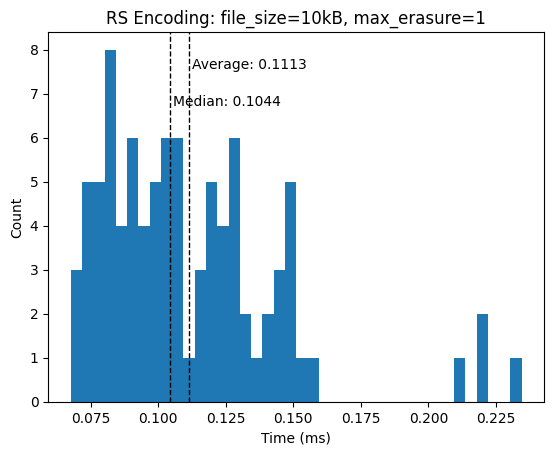

In [107]:
plt.hist(x_clipped, density=False, bins=40)  # density=False would make counts

min_ylim, max_ylim = plt.ylim()
plt.axvline(avg, color='k', linestyle='dashed', linewidth=1)
plt.text(avg*1.01, max_ylim*0.9, 'Average: {:.4f}'.format(avg))

plt.axvline(median, color='k', linestyle='dashed', linewidth=1)
plt.text(median*1.01, max_ylim*0.8, 'Median: {:.4f}'.format(median))

plt.ylabel('Count')
plt.xlabel('Time (ms)');
plt.title("RS Encoding: file_size=10kB, max_erasure=1")

plt.show()